In [9]:
# Import Dependencies
import numpy as np  ## For numerical operations (arrays, matrices, etc.)
import pandas as pd                     # For data manipulation and analysis
import matplotlib.pyplot as plt         # For plotting basic graphs (histogram, line, bar, etc.)
import seaborn as sns                   # For advanced visualizations (heatmaps, pairplots, etc.)

from sklearn.model_selection import train_test_split   # For splitting data into train and test sets
from xgboost import XGBClassifier                      # For classification using XGBoost
from xgboost import XGBRegressor                       # For regression using XGBoost
from sklearn import metrics                            # For performance evaluation (accuracy, RMSE, etc.)

Data Collection And Processing


In [15]:
# /loading Data from CSV file (comm separated values ) into pandas  DataFrames

calories = pd.read_csv("/content/calories.csv")

In [16]:
#  print the first 5 rowss of dataframes
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [17]:
exercise_data = pd.read_csv("/content/exercise.csv")

In [18]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining The two DataFrames

In [19]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)
# exercise_data (a full DataFrame)
# calories['Calories'] (a single column — likely a Series)
# And you’re doing it side by side -  axis=1.
#axis =0 - is stack one by one


In [20]:
calories_data.head() # see the calories is added at the end col

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [21]:
#  checking the nuber of rows and column
calories_data.shape
#(row,col)
# Rows = how many data entries (observations) you have

#Columns = how many features/attributes each entry has



(15000, 9)

In [22]:
#getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [23]:
# checking fot missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis

In [24]:
# # get some statistical measures about data
# #  why needed :
# Before training a model, you must know:

# What are the typical calorie values? (mean, median)

# Are some people doing super long workouts? (check max duration)

# Are all rows complete or are some missing? (count helps spot that)

# This helps you decide:

# Normalize data?

# Drop/keep certain features?

# Replace missing values?


In [25]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [26]:
# Plooting The gender column

<Axes: xlabel='Gender', ylabel='count'>

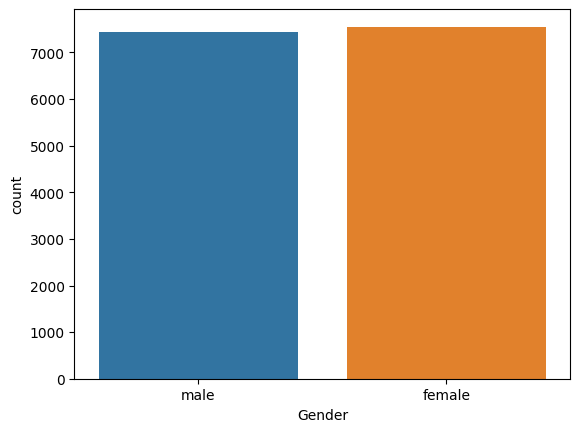

In [27]:
sns.countplot(x='Gender', data=calories_data, hue="Gender")
# countplot() is a function from the Seaborn library in Python.

# It creates a bar plot that shows the count of observations in each category of a categorical variable.

# A bar plot displaying how many entries fall into each gender category in your dataset.

# If you have two genders: Male and Female, you'll get two bars.



In [28]:
#  finding the distribution of Age "column"

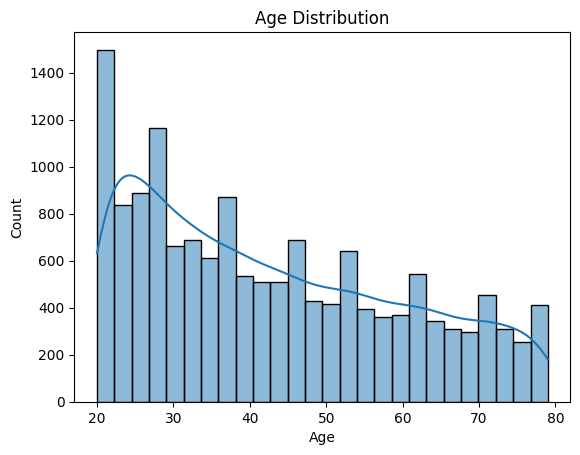

In [29]:
sns.histplot(calories_data['Age'], kde=True)
# Histogram = bars showing how many people are in each age group
# KDE (Kernel Density Estimate) = smooth line that shows data distribution curve
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [30]:
# Find the distribution of "height" column


Text(0.5, 1.0, 'Height Distribution')

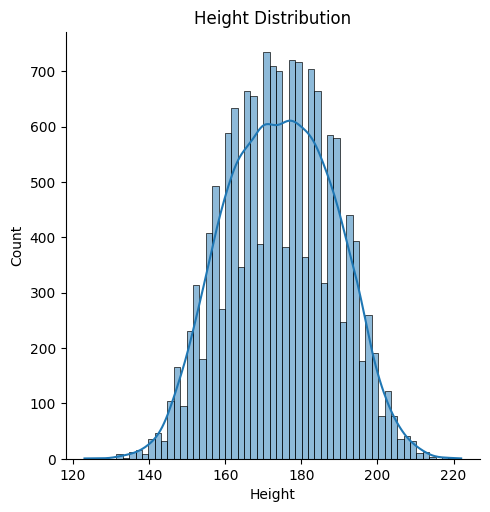

In [31]:
sns.displot(data=calories_data, x='Height', kde=True)
plt.title("Height Distribution")

# displot() is used to visualize the distribution of a numerical variable —
#  it helps you see the shape of the data.


# A normal distribution is a type of bell-shaped curve that shows how data is naturally spread around a central value (usually the mean).
#  mean median mode



# # diff

# .describe() gives numbers like mean, std, min, max.

# displot() gives a shape of the data.


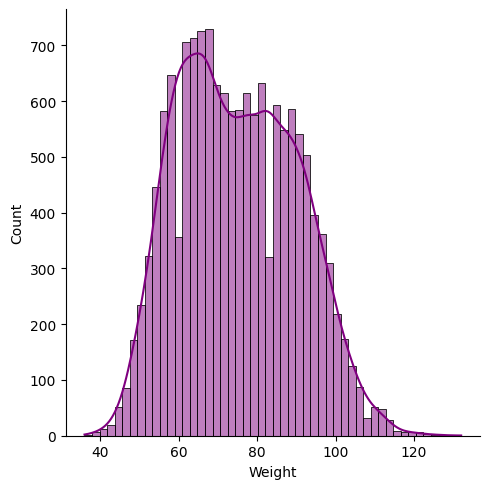

In [32]:
sns.displot(data=calories_data, x='Weight' , color='purple', kde=True)

Fiding Correlation in dataset


In [33]:
# Positive Correlation
# Negative Correlation

# 1:
# +1	Perfect positive correlation -
# As X increases, Y also increases.  Study hours ⬆️ → Marks ⬆️
# As X decreases, Y also decreases.
# The more you push one up, the more the other climbs with it — they’re in sync

# 2:
# 0	No correlation:

# 3:
# -1	Perfect negative correlation:

# As X increases, Y decreases. Stress ⬆️ → Sleep ⬇️
# As X decreases, Y increases.

In [34]:
# correlation = calories_data.corr()
# .corr() in Pandas only works on numeric columns.
# It measures how strongly each pair of numerical columns is related

# correlation is now a DataFrame where:

# Rows = features

# Columns = features

In [35]:
calories_data['Gender'].value_counts()


,count
Gender,
female,7553
male,7447


In [36]:
numeric_data = calories_data.select_dtypes(include=['int64', 'float64'])
#  give me ONLY the columns that are numbers."
# (Because the .corr() function doesn’t know how to deal with text like 'male', 'female', 'cardio'...

In [37]:
correlation = numeric_data.corr()


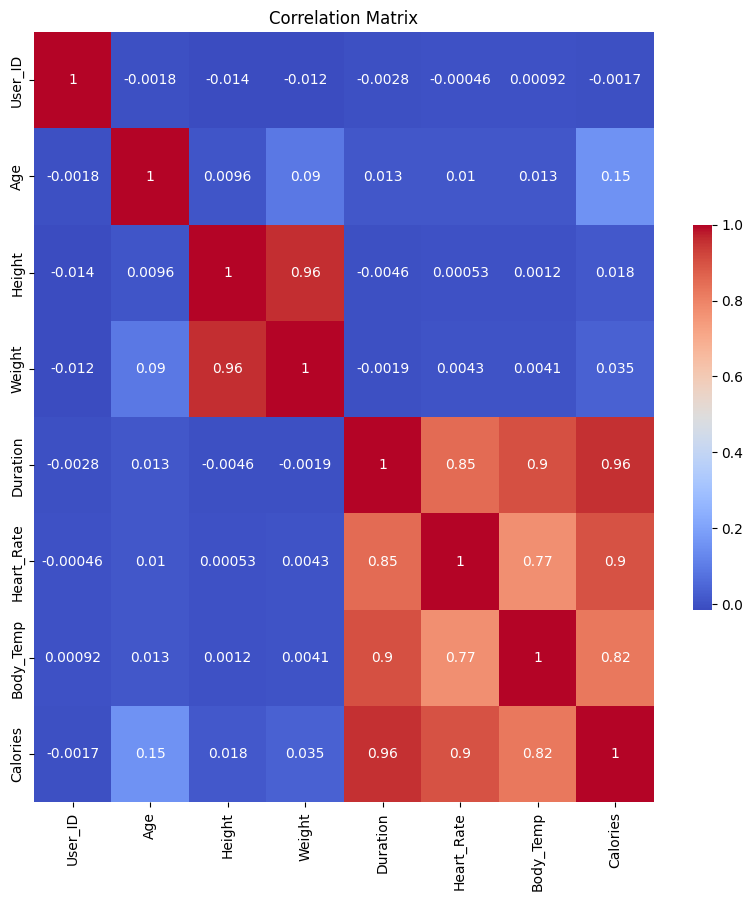

In [38]:
plt.figure(figsize=(10,10)) # 10 inches wide 10 inches Tall

sns.heatmap(correlation, annot=True, cmap='coolwarm' , cbar=True , cbar_kws={'shrink': 0.5}
)
# Annot:
# annot=True — Annotate the Cells
# “Show the actual correlation values inside each box.”

# /Coolwarm- cmp
# “Use the 'coolwarm' color scale where:
# cmp-Color Palette:
# Blue = negative correlation
# Red = positive correlation
# White = neutral (0)

# cbar - Color bar -Show a color legend (color bar)-“Okay red = strong... but how strong? Blue = weak... but HOW weak?!”

# red = +1.0, white = 0, blue = -1.0

plt.title("Correlation Matrix")
plt.show()
# A heatmap is a grid where:

# Each square represents a correlation value between two numeric features

# The color shows how strong the correlation is

# The number inside shows the exact correlation coefficient

In [39]:
# Dark red = strong positive correlation (close to +1)

# Dark blue = strong negative correlation (close to -1)

# Light/white = weak or no correlation (close to 0)

# How strongly is one column related to another in my dataset — numerically and directionally

#  Duration and Calories → 0.89 → Very strong positive correlation

# “The longer you work out, the more calories you burn.” Makes sense, right?


In [40]:
# Pick any row and column → that box = the correlation between those two features.

#  For example:

# Box at (Duration, Calories) = 0.96
# Means: when Duration increases, Calories burned also increases

# Strong positive correlation → 🔥 red box

# Box at (User_ID, Calories) = -0.0017
# Means: almost no relationship

# Color = dark blue or close to neutral → irrelevant



Coverting The text Data to Numerical Values - Categorical (text) data like 'Male', 'Female', 'Cardio', 'Running', etc.
How do I convert that into numbers so ML models like XGBoost or Linear Regression can understand it
 Linear - Predicting continuous values (e.g., salary, price)

 Line Equation	y = mx + c
 Type of Problem	Regression

Converting Data into Numericals :
ML algorithms (like XGBoost, Logistic Regression, SVM) can’t process text directly. They need numbers.

In [41]:
# 1. Label Encoding ( for ordinal or binary stuff)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
calories_data['Gender'] = le.fit_transform(calories_data['Gender'])
print(le.classes_)

#  apply the encoder to the 'Gender' column.

# 'Male', 'Female', 'Female', 'Male', 'Male'
# 1, 0, 0, 1, 1


#  Not ideal for multi-class unordered labels (like cities, colors) — for that, use OneHotEncoding



['female' 'male']


In [42]:
# 3.
calories_data.replace({"Gender":{'male':0,"female":1}} , inplace=True)
# inplace -change will be permanent true and carried out througout



In [43]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Separting Features and target

In [49]:
# 2. Split features and target
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

# drop User_id and Calories columns and give me the rest in X;
#  now assign Calories column to Y.

print(X.head())


# X = the inputs/features → like how many hours someone studied, their age, gender, BMI, etc.

# y = the output/label → what you want the model to predict, like their exam marks (or in your case, Calories burned)


   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       1   68   190.0    94.0      29.0       105.0       40.8
1       0   20   166.0    60.0      14.0        94.0       40.3
2       1   69   179.0    79.0       5.0        88.0       38.7
3       0   34   179.0    71.0      13.0       100.0       40.5
4       0   27   154.0    58.0      10.0        81.0       39.8


In [47]:
print(Y.head())

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64


Splitting The Data Into Training And Test Data

In [50]:
# In ML, we don't train and test the model on the same data — that’s cheating.
# So we split the dataset into two parts:

#  1. Training Data (X_train, y_train)
# Used to train the model.

# The model sees this data and learns the relationships between input (X) and output (y).

# Usually 70% to 80% of the total data.

# 2.
# Test Data (X_test, y_test)
# Used to test how well the model performs on unseen data.

# It’s like an exam — model has to predict the answers based on what it learned from training data.

# Usually 20% to 30% of the total data.



In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# test_size=0.2 → 20% of your data will go into testing, 80% for training.

# random_state=42 → this sets a seed for random number

In [54]:
print(X.shape , X_train.shape , X_test.shape)
#  shape ( row,col)

(15000, 7) (12000, 7) (3000, 7)


In [55]:
print(Y.shape , Y_train.shape , Y_test.shape)
#
#  shape ( row,col)

(15000,) (12000,) (3000,)


Model Training

Teaching the algorithm how to predict the output (y) from the input (X) by showing it lots of examples.

Suppose when weight = 65kg, height = 170cm, duration = 30min, calories burned = 250.
Now learn the pattern and do the same for new inputs."

 Technically Speaking:
Model training = finding the best values (parameters) that map input features to the correct output with the least error.

# Regression = Predicting a continuous number.
If your ML model is trying to guess a number (not a category), then you’re doing regression.

# XGBRegressor:
# A regression model from the XGBoost library — short for "eXtreme Gradient Boosting."

# It’s used when your target/output (y) is continuous numeric values, like: Calories burned ,  House price

# XGB builds many small models (decision trees), one after another.

# Each model tries to fix the mistakes  of the previous one.

# The final prediction is a smart combination of all models = boosted performance.


In [63]:
# loading The model
model = XGBRegressor()

In [65]:
# training the model with X_train
model.fit(X_train , Y_train)
# X_train = “This student studied for 3 hours, is 20 years old, and weighs 50kg”

# Y_train = “They burned 230 calories” // Output


# This means:

# a bunch of examples (X_train) and their correct answers (Y_train). Now learn the pattern so you can predict new answers later."

# So if you're using XGBRegressor(), this line:

# Builds a bunch of decision trees 🌳

# Trains them in sequence, each one correcting the last

# Tries to minimize error (like mean squared error)

# Stores the learned rules in model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction On Test Data

In [70]:
test_data_prediction = model.predict(X_test)

# ..is where your model finally shows off what it has learned during training

# X_test → unseen data (features only, no actual answers)

# model.predict() → uses the logic it learned during .fit()

# test_data_prediction → stores the model’s predicted calorie values based on X_test

In [71]:
print(test_data_prediction)
#  this shows the Calories burnt

[172.07645  195.7858    51.708874 ... 121.50776   19.239851 214.43597 ]


Mean absoulute Error

In [78]:

mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

# This tells you, on average, how far off your model’s predictions were from the actual values.

# For example:

# If your MAE is 5.7, then on average your model is off by 5.7 calories.

# Lower = better.


In [76]:

print("Mean Absolute Error:", mae)
# How did you evaluate your model?”

# You say:

# “I used Mean Absolute Error to measure how far off my predicted calorie values were from actual values.
#  My MAE was just 1.49, which means the model performs with high accuracy on unseen test data.


Mean Absolute Error: 1.4981198125282924
